In [ ]:
## 로지스틱 회귀

In [ ]:
## 전체소스코드
## https://bit.ly/hg-04-1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [8]:
fish['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [14]:
fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]].to_numpy()
##fish_input[:5]
fish_target = fish["Species"].to_numpy()
fish_target[:10]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream'], dtype=object)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target,
                                                                     stratify=fish_target)

In [18]:
print(np.shape(train_input))
print(np.shape(test_input))

(119, 5)
(40, 5)


In [19]:
# 스케일링
from sklearn.preprocessing import StandardScaler

In [20]:
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [22]:
z = np.arange(-5, 5, 0.1)
prob_y = 1/(1 + np.exp(-z))

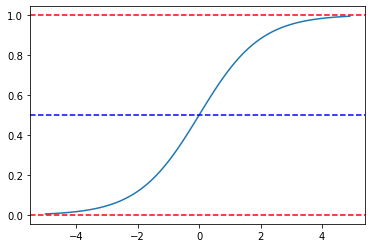

In [24]:
plt.plot(z, prob_y)

plt.axhline(1, linestyle = "--", color='r')
plt.axhline(0, linestyle = "--" , color='r')
plt.axhline(0.5, linestyle = "--", color="b")

plt.show()

In [25]:
## Boolean index
bream_smelt_index = (train_target == "Bream") | (train_target =="Smelt")

bream_smelt_index
# train_target

array([False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
        True, False, False,  True, False, False,  True,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False,  True, False,  True,  True, False, False,  True, False,
        True, False, False,  True, False, False,  True, False, False,
       False,  True,  True,  True, False,  True, False, False, False,
        True, False,  True, False,  True, False, False, False,  True,
       False, False])

In [27]:
train_bream_smelt = train_scaled[bream_smelt_index]
target_bream_smlet = train_target[bream_smelt_index]

print(np.shape(train_scaled))
print(np.shape(train_bream_smelt))

(119, 5)
(36, 5)


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smlet) #(x , y)

lr.score(train_bream_smelt, target_bream_smlet)

1.0

In [33]:
print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))
print(train_bream_smelt[:5])



['Smelt' 'Bream' 'Bream' 'Smelt' 'Bream']
[[0.07399441 0.92600559]
 [0.98624724 0.01375276]
 [0.99190899 0.00809101]
 [0.03132932 0.96867068]
 [0.99369567 0.00630433]]
[[-1.05302452 -1.31472755 -1.38134512 -1.4639791  -1.430566  ]
 [ 0.25535172  0.0998029   0.2616043   1.25588042  0.50935119]
 [ 0.52775984  0.31106394  0.49144697  1.44228487  0.4442906 ]
 [-1.07999293 -1.59947069 -1.61970047 -1.65391967 -1.90779783]
 [ 0.80016797  0.40291656  0.60211195  1.4383398   0.46041983]]


In [34]:
print(lr.coef_, lr.intercept_)

[[-0.41918646 -0.58840572 -0.67512412 -1.03404725 -0.77174889]] [-2.23855679]


In [39]:
# C = 1/lambda
lr = LogisticRegression(C = 20, max_iter = 100) 
#근사식 100번정도 까지 계산해 봐라. 지정해 주지 않으면 무한대로 계산할 수도 있음

lr.fit(train_scaled, train_target)

C:\Users\new333\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=20)

In [40]:
print(lr.score(train_scaled, train_target)) # 회귀 는 R스퀘어 값이 score
print(lr.score(test_scaled, test_target))

0.9159663865546218
0.975


In [43]:
print(lr.predict(test_scaled[:10]))
print(test_target[:10])

['Pike' 'Parkki' 'Bream' 'Bream' 'Bream' 'Roach' 'Roach' 'Perch' 'Pike'
 'Perch']
['Pike' 'Parkki' 'Bream' 'Bream' 'Bream' 'Roach' 'Roach' 'Perch' 'Pike'
 'Perch']


In [44]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [46]:
print(lr.coef_)
print(lr.intercept_)

[[-1.48217195 -1.34750734  2.08502366  7.91273021 -0.5992689 ]
 [-0.1765568  -1.73370943 -3.18070152  6.41146446 -2.49780081]
 [ 3.26019055  6.08613456 -9.09061392 -5.93599938  5.01183795]
 [-0.12866627  3.42007442  3.7427284  -3.30866052 -1.35509884]
 [-2.03371742 -6.0666611   4.64586707 -1.07178774  2.77629782]
 [-1.36082626  1.31678088  1.19159536 -4.99507669 -4.26614118]
 [ 1.92174815 -1.67511199  0.60610095  0.98732966  0.93017396]]
[-0.03021713 -0.46814577  2.71423741 -0.41142144  1.84817341 -6.43721772
  2.78459125]


In [ ]:
## 전체 소스코드
## http:s://bit.ly/hg-04-2

In [47]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [48]:
fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]].to_numpy()
fish_target = fish["Species"].to_numpy()

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
train_input, test_input, train_target, test_target = train_test_split(
fish_input, fish_target, stratify= fish_target)

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss .transform(train_input)
test_scaled = ss.transform(test_input)

In [53]:
from sklearn.linear_model import SGDClassifier

In [56]:
sc = SGDClassifier(loss = "log", max_iter=100) 
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=100)

In [57]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8571428571428571
0.85


In [58]:
## partial fit
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))



0.8319327731092437
0.8


In [59]:
classes = np.unique(train_target)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [61]:
sc = SGDClassifier(loss = "log")

train_score = []
test_score = []

for _ in range(0, 300) :
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))
    



In [62]:
train_score

[0.680672268907563,
 0.7394957983193278,
 0.6974789915966386,
 0.865546218487395,
 0.8067226890756303,
 0.8067226890756303,
 0.7226890756302521,
 0.7983193277310925,
 0.7815126050420168,
 0.8151260504201681,
 0.8907563025210085,
 0.8487394957983193,
 0.8067226890756303,
 0.7899159663865546,
 0.8403361344537815,
 0.7815126050420168,
 0.8823529411764706,
 0.7478991596638656,
 0.8571428571428571,
 0.8739495798319328,
 0.8151260504201681,
 0.907563025210084,
 0.865546218487395,
 0.907563025210084,
 0.8907563025210085,
 0.865546218487395,
 0.8403361344537815,
 0.8403361344537815,
 0.865546218487395,
 0.9411764705882353,
 0.7983193277310925,
 0.9495798319327731,
 0.8991596638655462,
 0.8739495798319328,
 0.9327731092436975,
 0.9327731092436975,
 0.8403361344537815,
 0.8403361344537815,
 0.8823529411764706,
 0.8571428571428571,
 0.7815126050420168,
 0.8403361344537815,
 0.9411764705882353,
 0.9243697478991597,
 0.8907563025210085,
 0.7899159663865546,
 0.8403361344537815,
 0.8907563025210085,

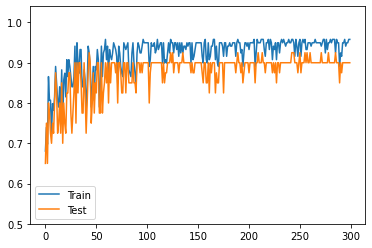

In [63]:
plt.plot(train_score, label = "Train")
plt.plot(test_score, label = "Test")

plt.ylim(0.5, 1.04)
plt.legend()

plt.show()